### Add scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 11\GMF-Investments-Portfolio-Management\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.modeling import ForecastModel
from scripts.finance_data_processor import FinanceDataProcessor

In [3]:
sns.set_theme()

### Data Loading

In [4]:
processor = FinanceDataProcessor()

bnd_data = processor.read_data(ticker='BND')

Prepare data for modeling

In [5]:
trainer = ForecastModel(data_frame=bnd_data)

trainer.preprocess_data()

d:\KifiyaAIM-Course\Week - 11\GMF-Investments-Portfolio-Management\scripts\modeling.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.training_set[self.column_name] = train_scaled.flatten()
d:\KifiyaAIM-Course\Week - 11\GMF-Investments-Portfolio-Management\scripts\modeling.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.testing_set[self.column_name] = test_scaled.flatten()


### Start modeling

1) ARIMA model

In [6]:
trainer.train_auto_arima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-16627.283, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16632.159, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16632.735, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16632.835, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16633.861, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16632.381, Time=0.37 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.342 seconds


2) Train SARIMA model

In [7]:
trainer.train_seasonal_arima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=-16626.876, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=-16632.159, Time=0.18 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=-16633.683, Time=0.93 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=-16633.519, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=-16633.861, Time=0.06 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=-16632.810, Time=0.39 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=-16632.558, Time=0.44 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=-16631.617, Time=0.81 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=-16632.735, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=-16632.835, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=-16632.381, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 5.144 seconds


3) Train LSTM

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0826 - val_loss: 0.0051
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0041 - val_loss: 0.0021
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0037 - val_loss: 0.0066
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0038 - val_loss: 9.1223e-04
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0031 - val_loss: 6.2793e-04
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0039 - val_loss: 8.3063e-04
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0032 - val_loss: 0.0017


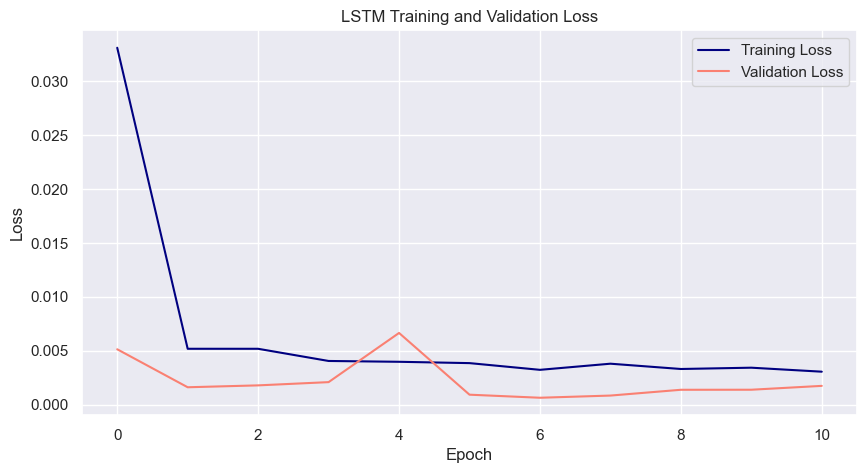

In [8]:
trainer.train_lstm()

### Now make predictions

In [9]:
trainer.make_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━